In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pivottablejs import pivot_ui

C:\Users\USER\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\USER\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\USER\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = json.load(open('data-sample.json', 'r'))

In [3]:
df = pd.DataFrame.from_dict(pd.json_normalize(data), orient='columns')

In [4]:
df

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,COLF01
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,COLF01
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01
3,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
4,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,2022-11-10 09:07:12 +0700,debonairPonie1,2022-11-10 09:38:04 +0700,done,Delivery,501af4e040a742e9e878,0.000000,0.000000,NaN,NaN,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1,CGK,COLF01
8330,2022-11-10 09:21:42 +0700,murkyThrushe3,2022-11-10 09:37:52 +0700,done,Delivery,5cc952d9e9f8066dbf24,110.352054,-7.892571,NaN,NaN,JOG,Failed,KOTA BANTUL,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,U01,1,TGR,COLF02
8331,2022-11-10 09:36:44 +0700,enragedCake7,2022-11-10 09:37:55 +0700,done,Delivery,1b136b5a3c60749eb571,105.664897,-5.359063,NaN,NaN,TKG,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,D01,1.44,CGK,COLF01
8332,2022-11-10 07:25:40 +0700,lyingPaella2,2022-11-10 10:37:53 +0800,done,Delivery,e92e813c8539080c922e,119.877173,-8.513305,151000.0,False,KOE,Failed,"KOMODO,LABUAN BAJO",PENERIMA PINDAH ALAMAT,U03,0.6,CGK,COLF02


In [5]:
df.columns

Index(['taskCreatedTime', 'taskAssignedTo', 'taskCompletedTime', 'taskStatus',
       'flow', 'taskId', 'taskLocationDone.lon', 'taskLocationDone.lat',
       'cod.amount', 'cod.received', 'UserVar.branch_dest',
       'UserVar.taskStatusLabel', 'UserVar.receiver_city',
       'UserVar.taskDetailStatusLabel', 'UserVar.taskDetailStatus',
       'UserVar.weight', 'UserVar.branch_origin', 'UserVar.taskStatus'],
      dtype='object')

In [6]:
df.shape

(8334, 18)

In [7]:
#Check Missing Value
df.isnull().sum().sort_values(ascending=False)

cod.received                     5976
cod.amount                       5976
taskCompletedTime                 768
taskLocationDone.lon              768
taskLocationDone.lat              768
UserVar.taskDetailStatus          762
UserVar.taskDetailStatusLabel     762
UserVar.taskStatusLabel           762
UserVar.taskStatus                762
UserVar.branch_origin             293
UserVar.receiver_city              52
taskAssignedTo                      1
UserVar.branch_dest                 0
taskId                              0
flow                                0
taskStatus                          0
UserVar.weight                      0
taskCreatedTime                     0
dtype: int64

Separate `COD` and `Non-COD` payment based on missing value in `cod.amount`. If any missing value in `cod.amount`, we can define as Non-COD payment else as COD payment


In [8]:
df['payment_method']= np.where(df['cod.amount'].isnull(), 'Non-COD', 'COD')

In [9]:
#Drop Missing Value
df2 = df.dropna(axis=0, subset=['taskAssignedTo'])
df3 = df2.dropna(axis=0, subset=['UserVar.taskStatus'])
df3.isnull().sum().sort_values(ascending=False)

cod.received                     5598
cod.amount                       5598
UserVar.branch_origin             279
UserVar.receiver_city              46
taskCompletedTime                   6
taskLocationDone.lon                6
taskLocationDone.lat                6
UserVar.taskStatus                  0
UserVar.weight                      0
UserVar.taskDetailStatus            0
UserVar.taskDetailStatusLabel       0
taskCreatedTime                     0
UserVar.taskStatusLabel             0
UserVar.branch_dest                 0
taskAssignedTo                      0
taskId                              0
flow                                0
taskStatus                          0
payment_method                      0
dtype: int64

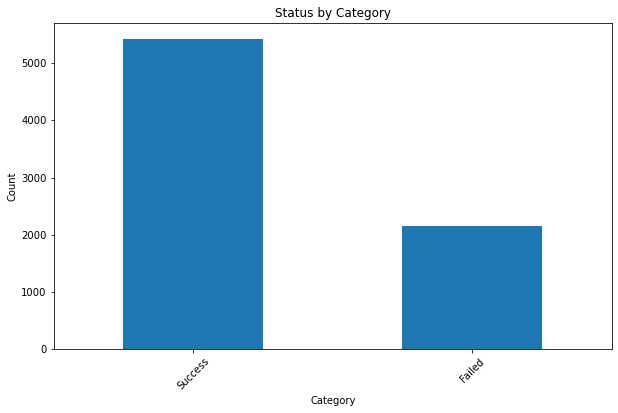

In [10]:
# Group the data by a categorical column (e.g., 'Category') and count the occurrences
status = df3['UserVar.taskStatusLabel'].value_counts()
# Plot the bar chart
plt.figure(figsize=(10, 6))
status.plot(kind='bar')
plt.title('Status by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [11]:
def pivot_ui(df, **kwargs):
    import pivottablejs
    class _DataFrame(pd.DataFrame):
        def to_csv(self, **kwargs):
            return super().to_csv(**kwargs).replace("\r\n", "\n")
    return pivottablejs.pivot_ui(_DataFrame(df), **kwargs)

In [12]:
#Make interesting pivot table
pivot_ui(df3)

# Reduce Cash on Delivery and RTO Losses

When the delivery agent is unable to deliver a package, it is marked RTO.
As a result, the order is sent back to the seller’s warehouse:
* Customer not available to receive the package
* Incorrect address
* Impulse buying
* Change in price
* Fraudulent intentions
* Courier company negligence/error
* Human error

So, here’s how e-commerce companies have tried to solve the RTO problem

1. Incentivize — Provide offers and coupons to users who pay online. Keep a Minimum Purchase Limit for availing COD — COD to be available only if users buy up to a minimum amount.
2. Charging for CoD — To discourage people from buying who are unsure about the purchase. However, serious buyers may also find this annoying.
3. Contact Info — Detect incorrect or incomplete addresses and update them. Add landmarks where possible and run basic sanity checks with a buyer’s contact number and email.
4. Fake Orders — Detect fake orders by identifying the buyer’s contact details. For instance, it could be a fake phone number, strange address, or even an email address. Certainly, the key here is to stay alert against fraud.
5. Disable CoD on-site — While this is a stop-gap solution, it does not solve the problem. Moreover, order volume reduces  drastically when you disallow CoD orders. Thus, it decreases your turnover.


Therefore, it would be better if regular monitoring was carried out with weekly or monthly periods for COD purchases.

# Analyze Cash On Delivery Losses

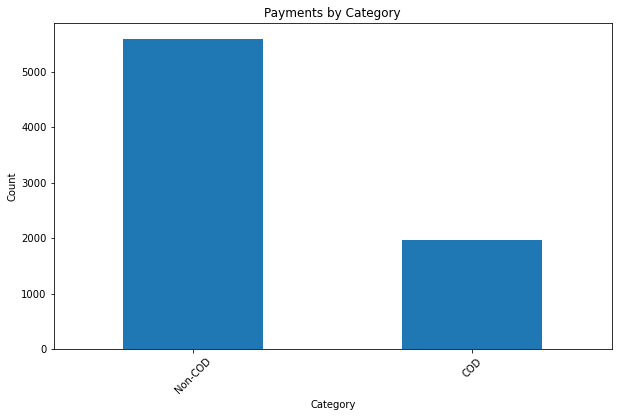

In [13]:
# Group the data by a categorical column (e.g., 'Category') and count the occurrences
cod_counts = df3['payment_method'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
cod_counts.plot(kind='bar')
plt.title('Payments by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [14]:
df4 =df3[df3['payment_method']=='COD']
df4

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus,payment_method
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,COLF01,COD
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,COLF01,COD
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01,COD
3,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01,COD
4,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01,COD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8286,2022-11-10 09:19:14 +0700,brainyBasmati9,2022-11-10 09:38:08 +0700,done,Delivery,696decc0bf5990af6b38,0.000000,0.000000,319000.0,False,BOO,Failed,"CILEUNGSI,KAB.BOGOR",PENERIMA MENOLAK MENERIMA KIRIMAN COD (TDK PESAN),U21,0.2,CGK,COLF02,COD
8299,2022-11-10 09:07:18 +0700,guiltyEggs0,2022-11-10 09:38:34 +0700,done,Delivery,92ec2704c98ef43b9364,114.572112,-0.614358,155000.0,False,BDJ,Failed,"TANAH SIANG,PURUKCAH",HOLD FOR FURTHER INSTRUCTI0N,CR5,1,CGK,COLF02,COD
8303,2022-11-10 09:27:58 +0700,similarDunbird5,2022-11-10 09:38:33 +0700,done,Delivery,c57cf6a756c579652ea0,104.233347,1.069963,158000.0,False,TNJ,Failed,SERI/SRI KUALA LOBAM,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,U01,1,CGK,COLF02,COD
8309,2022-11-10 09:36:24 +0700,amusedMagpie2,2022-11-10 09:37:58 +0700,done,Delivery,df65494d42a5bfacd3e7,106.859971,-6.677038,80499.0,False,BOO,Failed,"CISARUA,KAB.BOGOR",RUMAH service/ KANTOR KOSONG (MASIH DIHUNI),U05,2,CGK,COLF02,COD


## Analyze why COD Failed

In [15]:
df5=df4[df4['UserVar.taskStatusLabel']=='Failed']
df5.head()

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus,payment_method
681,2022-11-02 07:13:17 +0700,annoyedHare4,2022-11-02 10:06:31 +0900,done,Delivery,8803927e7397c68edc83,135.504418,-3.378995,284000.0,False,DJJ,Failed,NABIRE BARAT,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,U01,1,CGK,COLF02,COD
683,2022-11-02 08:04:47 +0700,cheerfulCoconut9,2022-11-02 08:06:32 +0700,done,Delivery,55742f0c5c64a8f2da48,111.330660,-8.203650,27404.0,False,MDN,Failed,"TULAKAN,PACITAN",MISROUTE,U12,0.14,CGK,COLF02,COD
696,2022-11-02 08:05:02 +0700,grumpySwift7,2022-11-02 08:06:37 +0700,done,Delivery,c65935806c67286c4c96,107.794090,-7.329564,26959.0,False,BDO,Failed,"CIKAJANG,GARUT",DITOLAK OLEH PENERIMA,U06,0.1,CGK,COLF02,COD
697,2022-11-02 07:32:47 +0700,wakefulWigeon8,2022-11-02 08:06:36 +0700,done,Delivery,e832cecd9c4974328d6a,102.391171,-3.809827,395500.0,False,BKS,Failed,"TABA PENANJUNG,ARGAM",DITOLAK OLEH PENERIMA,U06,3,CGK,COLF02,COD
699,2022-11-02 07:56:39 +0700,eagerHoopoe8,2022-11-02 09:06:38 +0800,done,Delivery,1571d31dd2aa06f00cc7,119.900915,-0.938402,209000.0,False,PLW,Failed,"PALU SELATAN,PALU",PENERIMA PINDAH ALAMAT,U03,1,CGK,COLF02,COD


### Reason why COD failed

In [16]:
df5.groupby(["UserVar.taskDetailStatusLabel","UserVar.taskStatusLabel"])["taskAssignedTo"].count().sort_values(ascending=False)

UserVar.taskDetailStatusLabel                      UserVar.taskStatusLabel
MISROUTE                                           Failed                     343
ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL        Failed                     249
RUMAH service/ KANTOR KOSONG (MASIH DIHUNI)        Failed                     227
DIAMBIL SENDIRI                                    Failed                      85
NEW ADDRESS                                        Failed                      56
DITOLAK OLEH PENERIMA                              Failed                      52
PENERIMA MENOLAK BAYAR (KIRIMAN COD)               Failed                      47
PENERIMA TIDAK DIKENAL                             Failed                      45
TUTUP PADA AKHIR PEKAN service/ HARI LIBUR         Failed                      30
MENUNGGU PEMBAYARAN COD                            Failed                      26
PENERIMA PINDAH ALAMAT                             Failed                      20
FORCE MAJEURE          

### Customer who often failed in COD

In [17]:
order_frequency = df5.groupby("taskAssignedTo")["taskId"].nunique().reset_index()
order_frequency.columns = ["taskAssignedTo", "frequency_failed"]
order_frequency.sort_values(by=['frequency_failed'], ascending=False)

,taskAssignedTo,frequency_failed
436,stressedRat6,30
159,excitedBustard4,29
73,cautiousUnicorn6,22
321,outlyingDoughnut6,20
84,cockyOwl8,18
...,...,...
207,grumpyCaribou3,1
206,grudgingSalami6,1
205,grudgingRaisins4,1
204,grudgingMuesli0,1


### Amount of COD received who failed

In [18]:
total_failed = df5.groupby("taskAssignedTo")["cod.amount"].sum().reset_index()
total_failed.columns = ["taskAssignedTo", "sum_failed_cod"]
total_failed.sort_values(by=['sum_failed_cod'], ascending=False)

,taskAssignedTo,sum_failed_cod
321,outlyingDoughnut6,7161405.0
46,ashamedHare6,5106860.0
232,hushedLion3,4730000.0
5,aboardRelish5,4672705.0
174,finickyPie7,4553000.0
...,...,...
441,sugarySausage6,14183.0
0,abjectCaribou1,12950.0
406,similarTortoise5,12850.0
165,excludedCod5,11500.0


### Combine frequency order and Total amount Customer

In [19]:
failed_comb=order_frequency.merge(total_failed, on='taskAssignedTo', how='left')
failed_comb.sort_values(by=['frequency_failed','sum_failed_cod'], ascending=False)

,taskAssignedTo,frequency_failed,sum_failed_cod
436,stressedRat6,30,1593536.0
159,excitedBustard4,29,1844293.0
73,cautiousUnicorn6,22,2211496.0
321,outlyingDoughnut6,20,7161405.0
84,cockyOwl8,18,1566882.0
...,...,...,...
441,sugarySausage6,1,14183.0
0,abjectCaribou1,1,12950.0
406,similarTortoise5,1,12850.0
165,excludedCod5,1,11500.0


### Branch Destinantion who often failed

In [20]:
dest_failed = df5.groupby("UserVar.branch_dest")["taskId"].nunique().reset_index()
dest_failed.columns = ["UserVar.branch_dest", "sum_failed_dest"]
dest_failed.sort_values(by=['sum_failed_dest'], ascending=False)

,UserVar.branch_dest,sum_failed_dest
47,SRG,159
38,PLM,99
25,KOE,96
35,PGK,64
23,KDI,60
40,PNK,50
31,MJK,48
10,CBN,45
7,BPN,42
43,SMD,42


In [21]:
df5[df5['taskAssignedTo']=='excitedBustard4']

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus,payment_method
1106,2022-11-02 07:10:36 +0700,excitedBustard4,2022-11-02 07:37:25 +0700,done,Delivery,3e0aeaba3153542bcdbb,111.583785,-6.739677,49900.0,False,SRG,Failed,"SEDAN,REMBANG",MISROUTE,U12,0.3,CGK,COLF02,COD
1109,2022-11-02 07:10:36 +0700,excitedBustard4,2022-11-02 07:37:25 +0700,done,Delivery,8a9d0a13d5d861ede8f0,111.583785,-6.739677,15300.0,False,SRG,Failed,"SEDAN,REMBANG",MISROUTE,U12,0.4,CGK,COLF02,COD
1110,2022-11-02 07:10:36 +0700,excitedBustard4,2022-11-02 07:37:25 +0700,done,Delivery,5c86077fa94abd0d16cf,111.583785,-6.739677,35087.0,False,SRG,Failed,"SEDAN,REMBANG",MISROUTE,U12,0.5,CGK,COLF02,COD
1111,2022-11-02 07:10:36 +0700,excitedBustard4,2022-11-02 07:37:25 +0700,done,Delivery,42c7851e63dca8d42b09,111.583785,-6.739677,69670.0,False,SRG,Failed,"SEDAN,REMBANG",MISROUTE,U12,0.13,CGK,COLF02,COD
1113,2022-11-02 07:10:36 +0700,excitedBustard4,2022-11-02 07:37:25 +0700,done,Delivery,f339cf4736f4a53c0f36,111.583785,-6.739677,32999.0,False,SRG,Failed,"SEDAN,REMBANG",MISROUTE,U12,0.2,CGK,COLF02,COD
1114,2022-11-02 07:10:36 +0700,excitedBustard4,2022-11-02 07:37:25 +0700,done,Delivery,277df13fce9ed619cd35,111.583785,-6.739677,42048.0,False,SRG,Failed,"SEDAN,REMBANG",MISROUTE,U12,0.365,CGK,COLF02,COD
1115,2022-11-02 07:10:36 +0700,excitedBustard4,2022-11-02 07:37:25 +0700,done,Delivery,673efee5f8d082354f3b,111.583785,-6.739677,31000.0,False,SRG,Failed,"SEDAN,REMBANG",MISROUTE,U12,0.2,CGK,COLF02,COD
1117,2022-11-02 07:10:36 +0700,excitedBustard4,2022-11-02 07:37:25 +0700,done,Delivery,a61681fefe672c5603ea,111.583785,-6.739677,6500.0,False,SRG,Failed,"SEDAN,REMBANG",MISROUTE,U12,0.9,CGK,COLF02,COD
1119,2022-11-02 07:10:35 +0700,excitedBustard4,2022-11-02 07:37:25 +0700,done,Delivery,aba49e6d9a069e204ab7,111.583785,-6.739677,161600.0,False,SRG,Failed,"SEDAN,REMBANG",MISROUTE,U12,0.5,CGK,COLF02,COD
1120,2022-11-02 07:10:35 +0700,excitedBustard4,2022-11-02 07:37:25 +0700,done,Delivery,77e6d4ff2ecd174f54b1,111.583785,-6.739677,111000.0,False,SRG,Failed,"SEDAN,REMBANG",MISROUTE,U12,0.05,CGK,COLF02,COD
